In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [21]:
df = pd.read_csv("vehicle_loan_train.csv")
print(df.shape)
df.head()

(233154, 41)


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [22]:
df["DATE_OF_BIRTH"] = df["DATE_OF_BIRTH"].str.replace("-", "/")

In [23]:
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01/01/1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31/07/1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24/08/1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30/12/1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09/12/1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01/08/1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05/12/1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01/06/1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26/03/1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [26]:
df["DATE_OF_BIRTH"] = pd.to_datetime(df["DATE_OF_BIRTH"], infer_datetime_format=True)

In [27]:
df["DATE_OF_BIRTH"] = df["DATE_OF_BIRTH"].dt.year

In [28]:
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [29]:
list(df._get_numeric_data().columns)

['UNIQUEID',
 'DISBURSED_AMOUNT',
 'ASSET_COST',
 'LTV',
 'BRANCH_ID',
 'SUPPLIER_ID',
 'MANUFACTURER_ID',
 'CURRENT_PINCODE_ID',
 'DATE_OF_BIRTH',
 'STATE_ID',
 'EMPLOYEE_CODE_ID',
 'MOBILENO_AVL_FLAG',
 'AADHAR_FLAG',
 'PAN_FLAG',
 'VOTERID_FLAG',
 'DRIVING_FLAG',
 'PASSPORT_FLAG',
 'PERFORM_CNS_SCORE',
 'PRI_NO_OF_ACCTS',
 'PRI_ACTIVE_ACCTS',
 'PRI_OVERDUE_ACCTS',
 'PRI_CURRENT_BALANCE',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'SEC_NO_OF_ACCTS',
 'SEC_ACTIVE_ACCTS',
 'SEC_OVERDUE_ACCTS',
 'SEC_CURRENT_BALANCE',
 'SEC_SANCTIONED_AMOUNT',
 'SEC_DISBURSED_AMOUNT',
 'PRIMARY_INSTAL_AMT',
 'SEC_INSTAL_AMT',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'NO_OF_INQUIRIES',
 'LOAN_DEFAULT']

In [42]:
num_columns = [
 'DISBURSED_AMOUNT',
 'ASSET_COST',
 'LTV',
 'MANUFACTURER_ID',
 'CURRENT_PINCODE_ID',
 'EMPLOYEE_CODE_ID',
 'MOBILENO_AVL_FLAG',
 'AADHAR_FLAG',
 'PAN_FLAG',
 'VOTERID_FLAG',
 'DRIVING_FLAG',
 'PASSPORT_FLAG',
 'PERFORM_CNS_SCORE',
 'PRI_NO_OF_ACCTS',
 'PRI_ACTIVE_ACCTS',
 'PRI_OVERDUE_ACCTS',
 'PRI_CURRENT_BALANCE',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'SEC_NO_OF_ACCTS',
 'SEC_ACTIVE_ACCTS',
 'SEC_OVERDUE_ACCTS',
 'SEC_CURRENT_BALANCE',
 'SEC_SANCTIONED_AMOUNT',
 'SEC_DISBURSED_AMOUNT',
 'PRIMARY_INSTAL_AMT',
 'SEC_INSTAL_AMT',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'AVERAGE_ACCT_AGE',
 'CREDIT_HISTORY_LENGTH',
 'NO_OF_INQUIRIES',
 'LOAN_DEFAULT']

In [43]:
cat_columns = ['AVERAGE_ACCT_AGE', 'EMPLOYMENT_TYPE', 'CREDIT_HISTORY_LENGTH', 'DATE_OF_BIRTH']b

In [56]:
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].str.replace('yrs ','.',regex=False)
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].str.replace('mon','',regex=False).astype(float)
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].str.replace('yrs ','.',regex=False)
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].str.replace('mon','',regex=False).astype(float)

In [82]:
cat = df[cat_columns]
cat = pd.get_dummies(cat)
cat

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,DATE_OF_BIRTH,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed
1850,0.00,0.0,1993,1,0
20434,0.00,0.0,1993,0,1
55614,0.11,1.0,1974,1,0
150207,0.00,0.0,1994,0,1
195787,0.00,0.0,1976,0,1
...,...,...,...,...,...
18800,0.10,0.2,1975,0,1
44681,0.90,2.1,1994,1,0
208332,0.00,0.0,1994,1,0
112202,1.40,3.0,1992,1,0


In [83]:
new_df = pd.concat([cat, df[num_columns]], axis=1)

In [84]:
#df["EMPLOYMENT_TYPE"].fillna("None", inplace = True)
new_df

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,DATE_OF_BIRTH,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,CURRENT_PINCODE_ID,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
1850,0.00,0.0,1993,1,0,35939,68412,54.08,86,7102,...,0,0,0,0,0,0,0.00,0.0,0,1
20434,0.00,0.0,1993,0,1,52333,78500,71.34,45,5650,...,0,0,0,0,0,0,0.00,0.0,0,0
55614,0.11,1.0,1974,1,0,55159,71386,79.15,45,1446,...,0,0,0,0,0,0,0.11,1.0,0,0
150207,0.00,0.0,1994,0,1,49803,64866,78.62,45,116,...,0,0,0,0,0,0,0.00,0.0,1,1
195787,0.00,0.0,1976,0,1,52303,69472,76.29,86,1043,...,0,0,0,0,0,0,0.00,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18800,0.10,0.2,1975,0,1,63947,73000,89.04,86,1711,...,0,0,12361,0,2,0,0.10,0.2,1,0
44681,0.90,2.1,1994,1,0,43594,68572,65.62,86,1828,...,0,0,1565,0,2,0,0.90,2.1,0,0
208332,0.00,0.0,1994,1,0,67069,85985,79.67,45,1510,...,0,0,0,0,0,0,0.00,0.0,0,1
112202,1.40,3.0,1992,1,0,39394,56322,72.80,45,88,...,85543,85543,0,7373,2,0,1.40,3.0,0,0


In [85]:
# Over sampling to resolve imbalance
df = df.sample(frac=1)
loan_default_1 = new_df.loc[df['LOAN_DEFAULT'] == 1]
loan_default_0 = new_df.loc[df['LOAN_DEFAULT'] == 0]

normal_distributed_df = pd.concat([loan_default_1, loan_default_1, loan_default_1, loan_default_0])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,DATE_OF_BIRTH,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,CURRENT_PINCODE_ID,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
67970,0.8,1.9,1993,1,0,53139,101518,55.16,86,2686,...,0,0,11860,0,3,0,0.8,1.9,2,0
147741,0.9,0.9,1993,1,0,57259,68684,84.44,86,2991,...,0,0,1797,0,0,1,0.9,0.9,1,0
12802,0.0,0.0,1991,1,0,50203,68880,74.77,45,1512,...,0,0,0,0,0,0,0.0,0.0,0,1
69632,0.0,0.0,1997,1,0,52078,70193,76.22,86,1730,...,0,0,0,0,0,0,0.0,0.0,0,1
105732,0.7,0.8,1996,1,0,52479,72679,77.05,86,3392,...,0,0,17032,0,0,1,0.7,0.8,0,0


In [86]:
X = new_df.drop('LOAN_DEFAULT', axis=1)
y = new_df['LOAN_DEFAULT'].copy()

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [88]:
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (250782, 37)
X_test size:  (83594, 37)


In [89]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=42)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9248


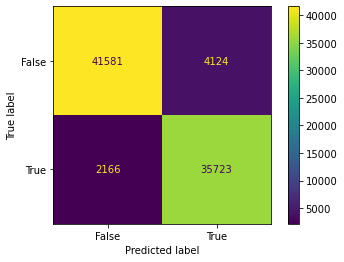

In [91]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     45705
           1       0.90      0.94      0.92     37889

    accuracy                           0.92     83594
   macro avg       0.92      0.93      0.92     83594
weighted avg       0.93      0.92      0.92     83594

